This python notebook is for extracting data from vibrastic labview vibration measurement data application

Necessary library loaded from this section

In [36]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import csv
import numpy as np
import sys
import tkinter as tk
import pandas as pd
from tkinter import filedialog
from additional_functions import *


Select measurement data using procedure as follows

In [2]:
root = tk.Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
fs = 25600 #input frequency sampling as measured

file_path = filedialog.askopenfilename(multiple=False)
%gui tk

Collect data and store into arrays

In [3]:
file = open(file_path)
type(file)
t, s0, s1, s2, s3 = ([], [], [], [], [])


for line in file:
    splitrow = line.rstrip().split("	")
    t.append(float(splitrow[0].replace(",", ".")))
    s0.append(float(splitrow[1].replace(",", ".")))
    s1.append(float(splitrow[2].replace(",", ".")))
    s2.append(float(splitrow[3].replace(",", ".")))
    s3.append(float(splitrow[4].replace(",", ".")))

Plot time domain measurement data from each sensors

In [21]:
# Convert acceleration data units from m/s^2 to g
g_converter = 9.80665   # a constant, 1 g ~ 9.80665 m/s^2 
sensor_0 = np.asarray(s0)/g_converter

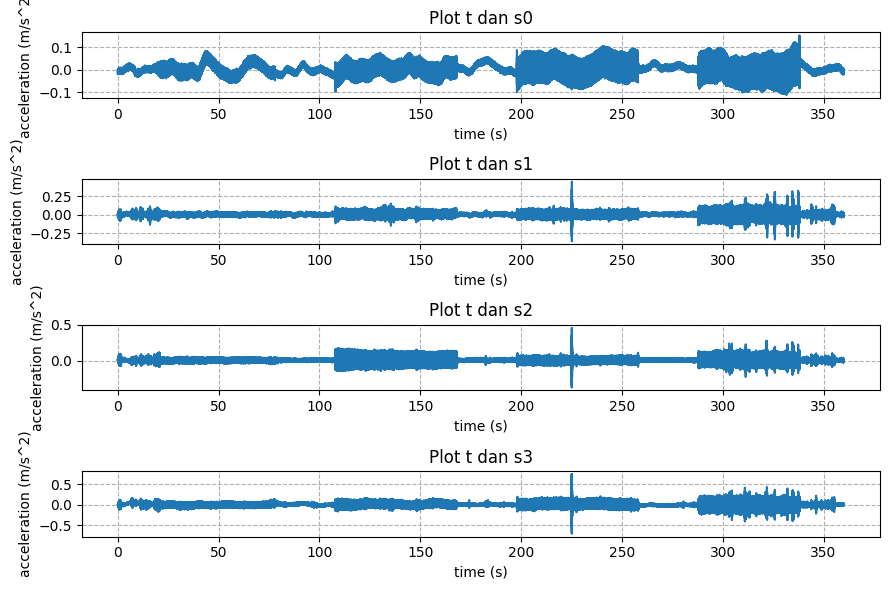

In [5]:
fig1 = plt.figure(figsize=(9,6), tight_layout=True)
ax1 = fig1.add_subplot(411)
ax1.set_facecolor('white')
ax1.grid(True,which='both',ls='--')
ax1.plot(t,s0)
ax1.set_title('Plot t dan s0')
ax1.set_ylabel("acceleration (m/s^2)")
ax1.set_xlabel("time (s)")
ax2 = fig1.add_subplot(412)
ax2.plot(t,s1)
ax2.set_facecolor('white')
ax2.grid(True,which='both',ls='--')
ax2.set_title('Plot t dan s1')
ax2.set_ylabel("acceleration (m/s^2)")
ax2.set_xlabel("time (s)")
ax3 = fig1.add_subplot(413)
ax3.set_facecolor('white')
ax3.grid(True,which='both',ls='--')
ax3.plot(t,s2)
ax3.set_title('Plot t dan s2')
ax3.set_ylabel("acceleration (m/s^2)")
ax3.set_xlabel("time (s)")
ax4 = fig1.add_subplot(414)
ax4.set_facecolor('white')
ax4.grid(True,which='both',ls='--')
ax4.plot(t,s3)
ax4.set_title('Plot t dan s3')
ax4.set_ylabel("acceleration (m/s^2)")
ax4.set_xlabel("time (s)")
plt.show()

In [4]:
data = np.array([s0, s1, s2, s3])
#note that this process convert measured data into array

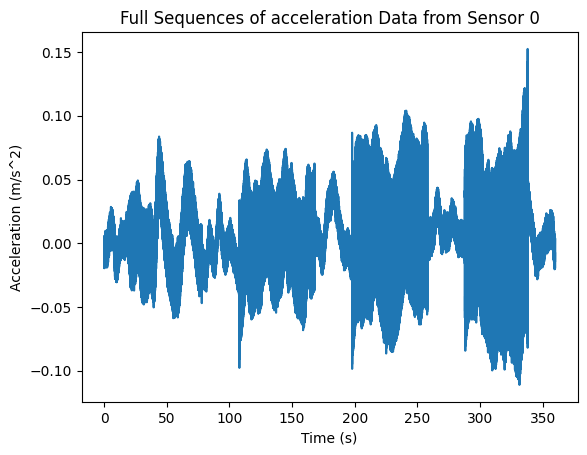

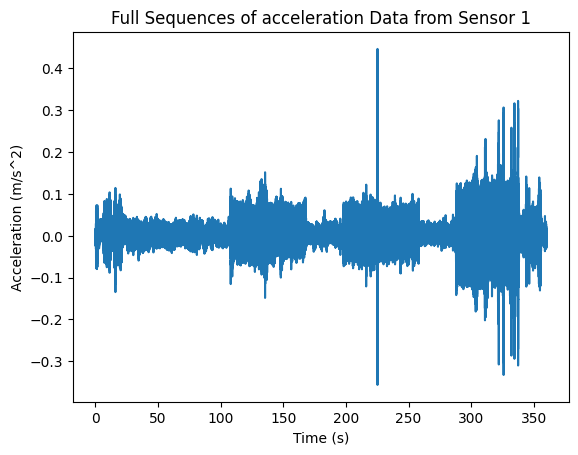

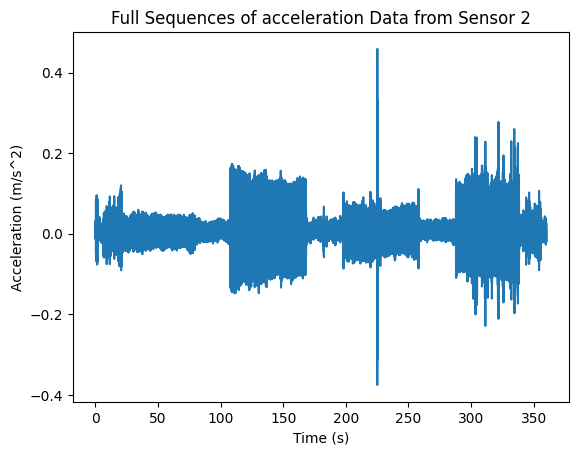

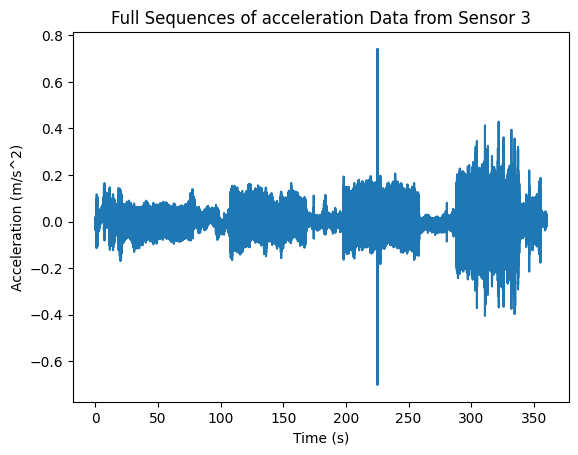

In [5]:
for i in range(len(data)):
    plt.figure()
    plt.plot(t,data[i])
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s^2)")
    plt.title("Full Sequences of acceleration Data from Sensor "+str(i))


Segments measurement data into each tone source

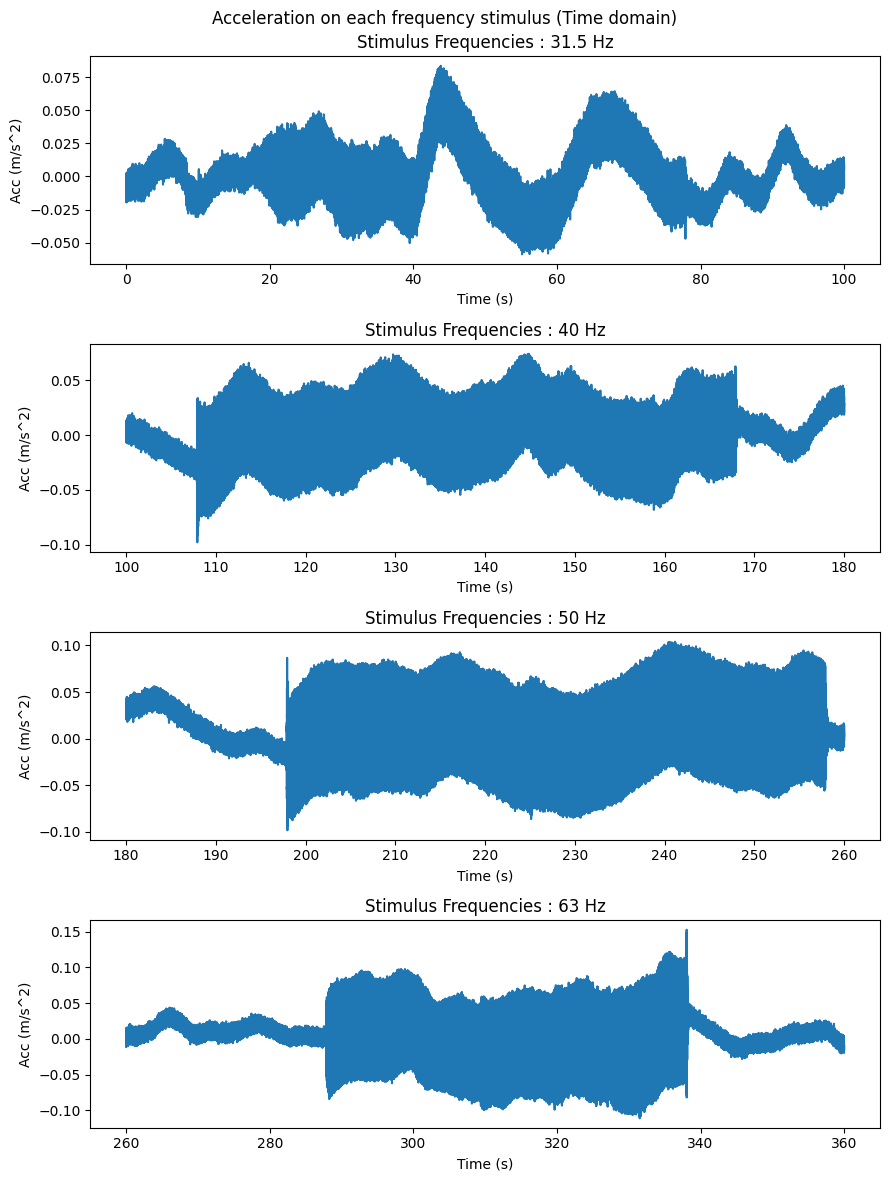

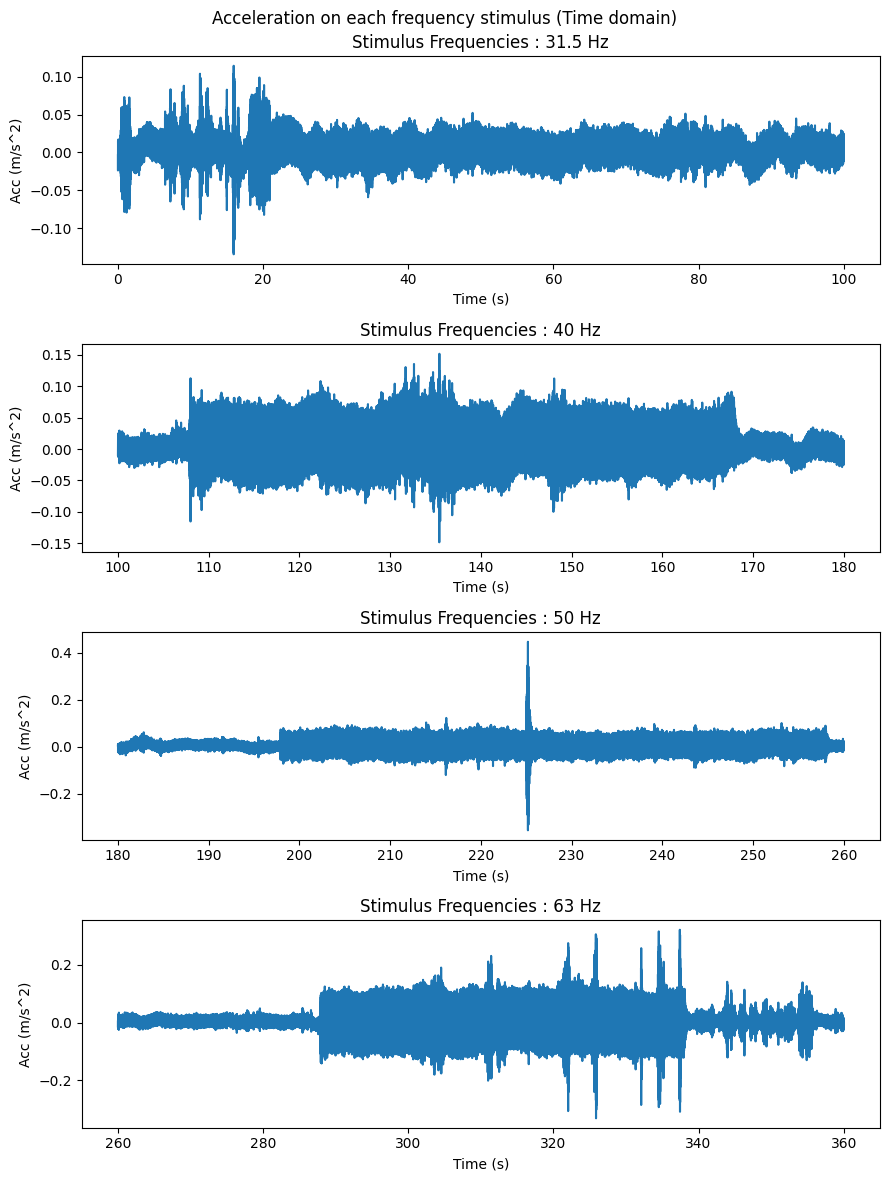

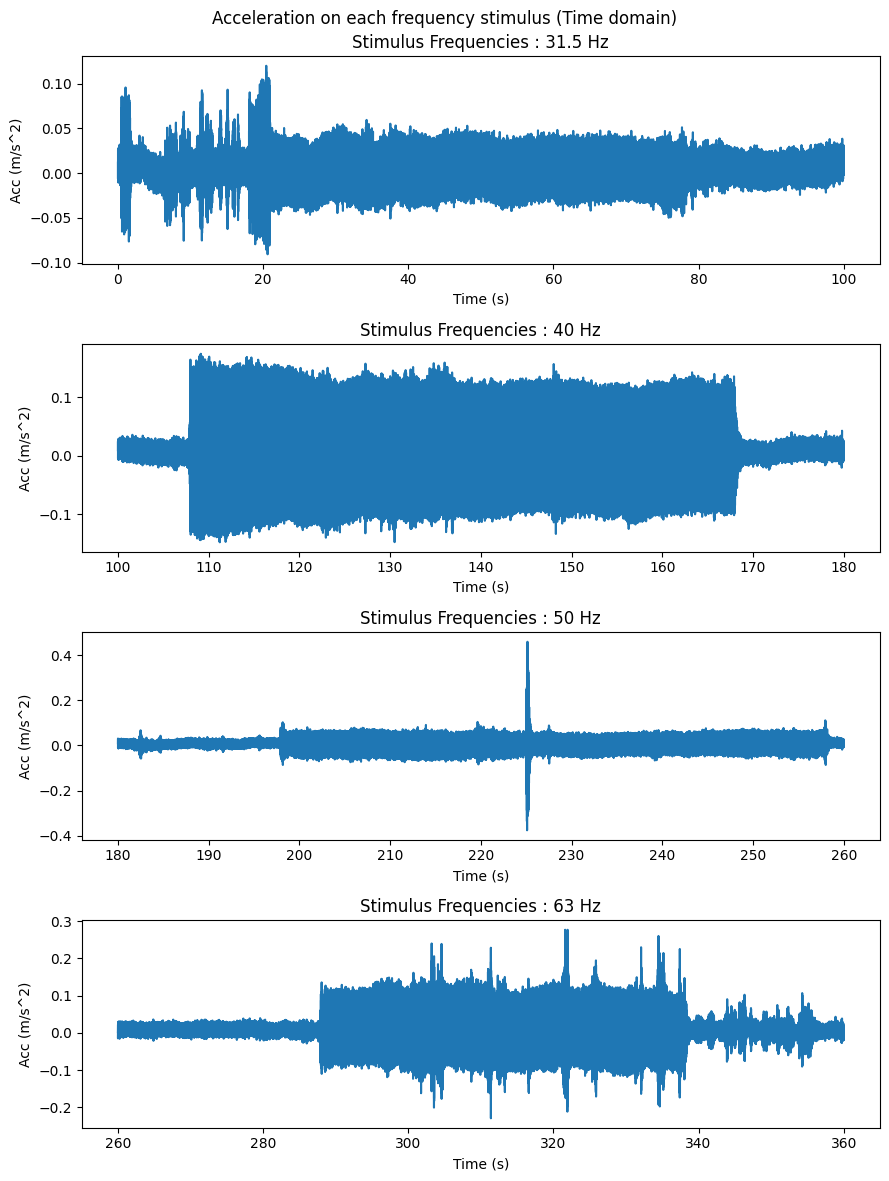

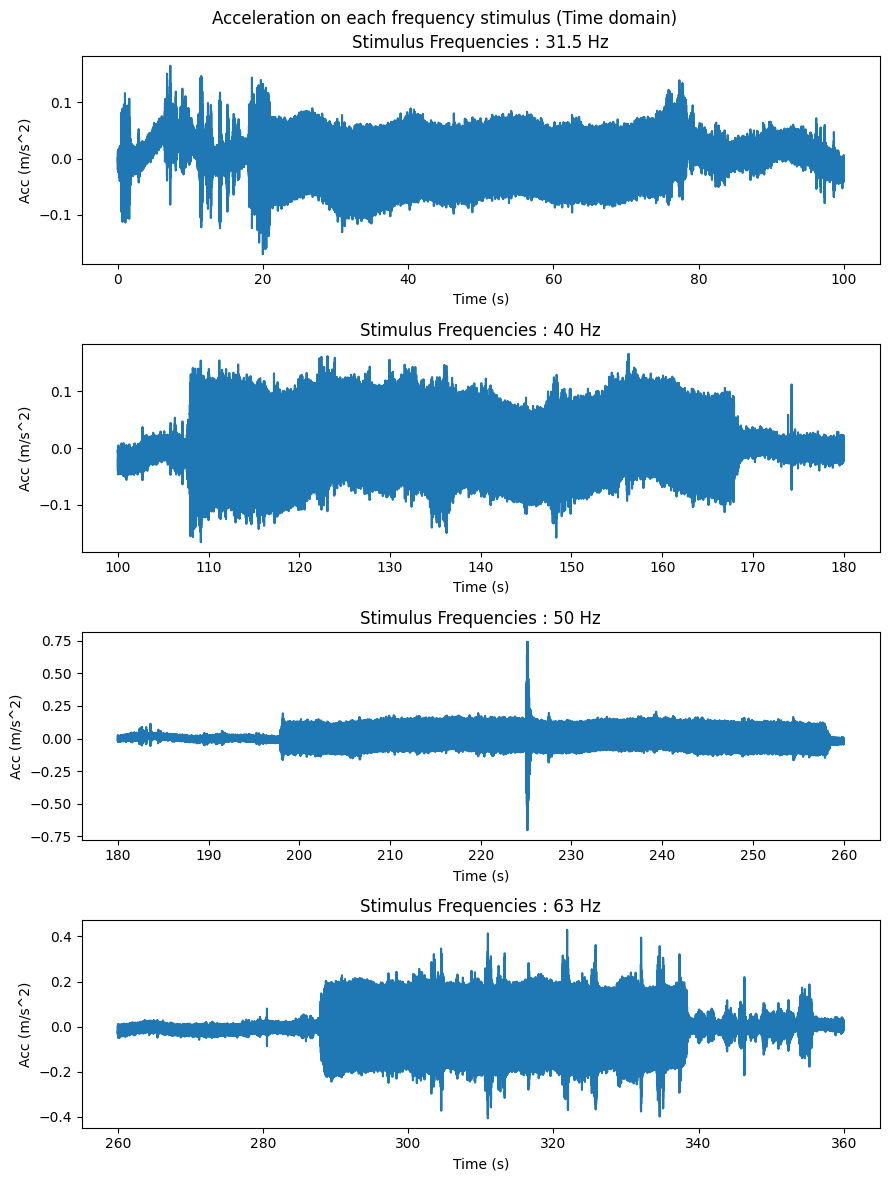

In [11]:
ni_fs = 25600
freq_stimulus = ["31.5", "40", "50", "63"]
datapoints = [
    [0*ni_fs, 100*ni_fs],
    [100*ni_fs, 180*ni_fs],
    [180*ni_fs, 260*ni_fs],
    [260*ni_fs, 360*ni_fs],
    ]

segmented_data = []
for i in range(len(data)):
    segmented_data.append(segmenting_data(data[i], datapoints))

# interpret acceleration in time domain data for each frequencies
for pivot in range(len(segmented_data)):
    plt.figure(figsize=(9,12), tight_layout=True)
    plt.suptitle("Acceleration on each frequency stimulus (Time domain) for sensor "+str(pivot))
    for i in range(len(datapoints)):
        plt.subplot(len(datapoints),1,i+1)
        plt.plot(t[datapoints[i][0]:datapoints[i][1]], segmented_data[pivot][i])
        plt.xlabel("Time (s)")
        plt.ylabel("Acc (m/s^2)")
        plt.title("Stimulus Frequencies : " + freq_stimulus[i] + " Hz")


plt.show()

In [27]:
valmax = []
for pivot in range(len(segmented_data)):
    for i in range(len(datapoints)):
        print("max value (of time domain) in sensor "+str(pivot)+" with frequency stimulus "+str(freq_stimulus[i])+" Hz is "+str(max(abs(segmented_data[pivot][i])))+" m/s^2")

max value in sensor 0 with frequency stimulus 31.5 Hz is 0.083726 m/s^2
max value in sensor 0 with frequency stimulus 40 Hz is 0.097841 m/s^2
max value in sensor 0 with frequency stimulus 50 Hz is 0.104011 m/s^2
max value in sensor 0 with frequency stimulus 63 Hz is 0.152461 m/s^2
max value in sensor 1 with frequency stimulus 31.5 Hz is 0.134611 m/s^2
max value in sensor 1 with frequency stimulus 40 Hz is 0.151852 m/s^2
max value in sensor 1 with frequency stimulus 50 Hz is 0.44681 m/s^2
max value in sensor 1 with frequency stimulus 63 Hz is 0.332825 m/s^2
max value in sensor 2 with frequency stimulus 31.5 Hz is 0.120098 m/s^2
max value in sensor 2 with frequency stimulus 40 Hz is 0.174069 m/s^2
max value in sensor 2 with frequency stimulus 50 Hz is 0.459037 m/s^2
max value in sensor 2 with frequency stimulus 63 Hz is 0.276794 m/s^2
max value in sensor 3 with frequency stimulus 31.5 Hz is 0.170152 m/s^2
max value in sensor 3 with frequency stimulus 40 Hz is 0.165895 m/s^2
max value in 

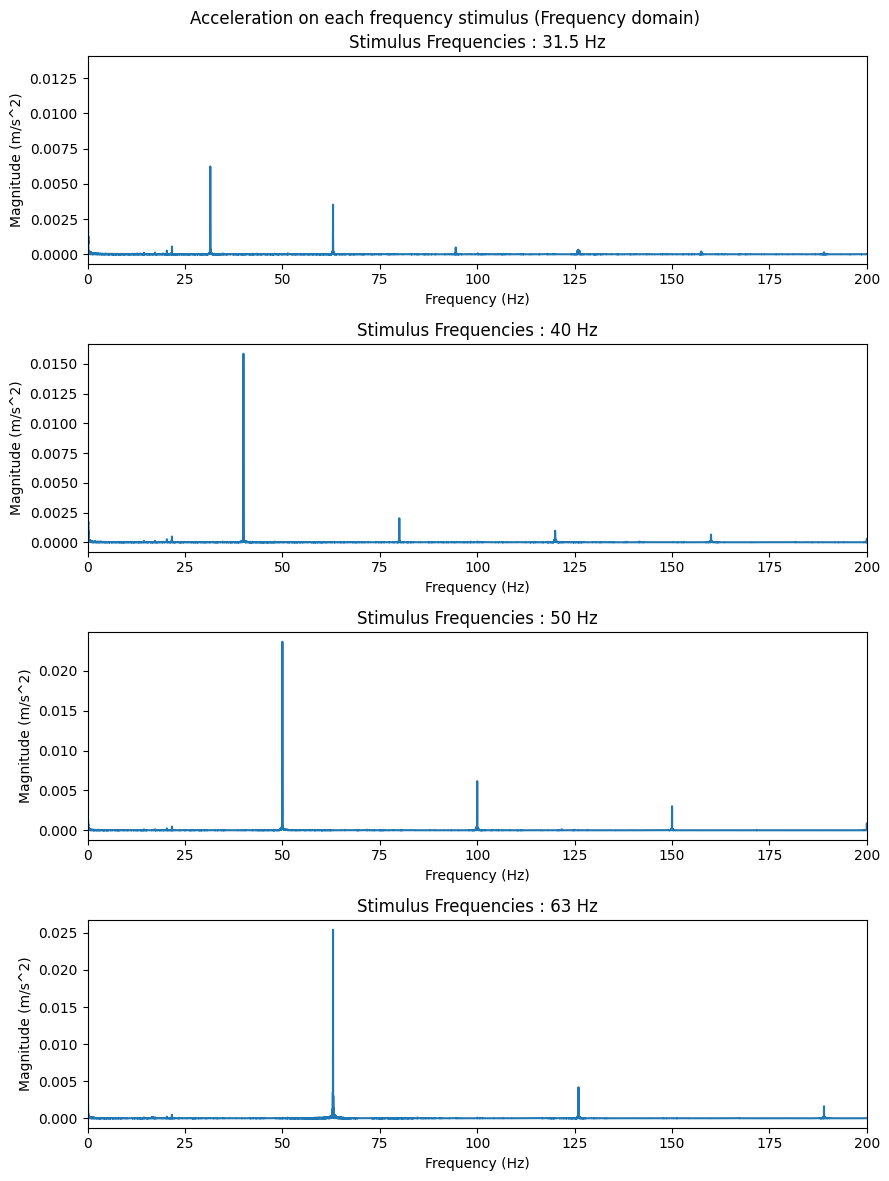

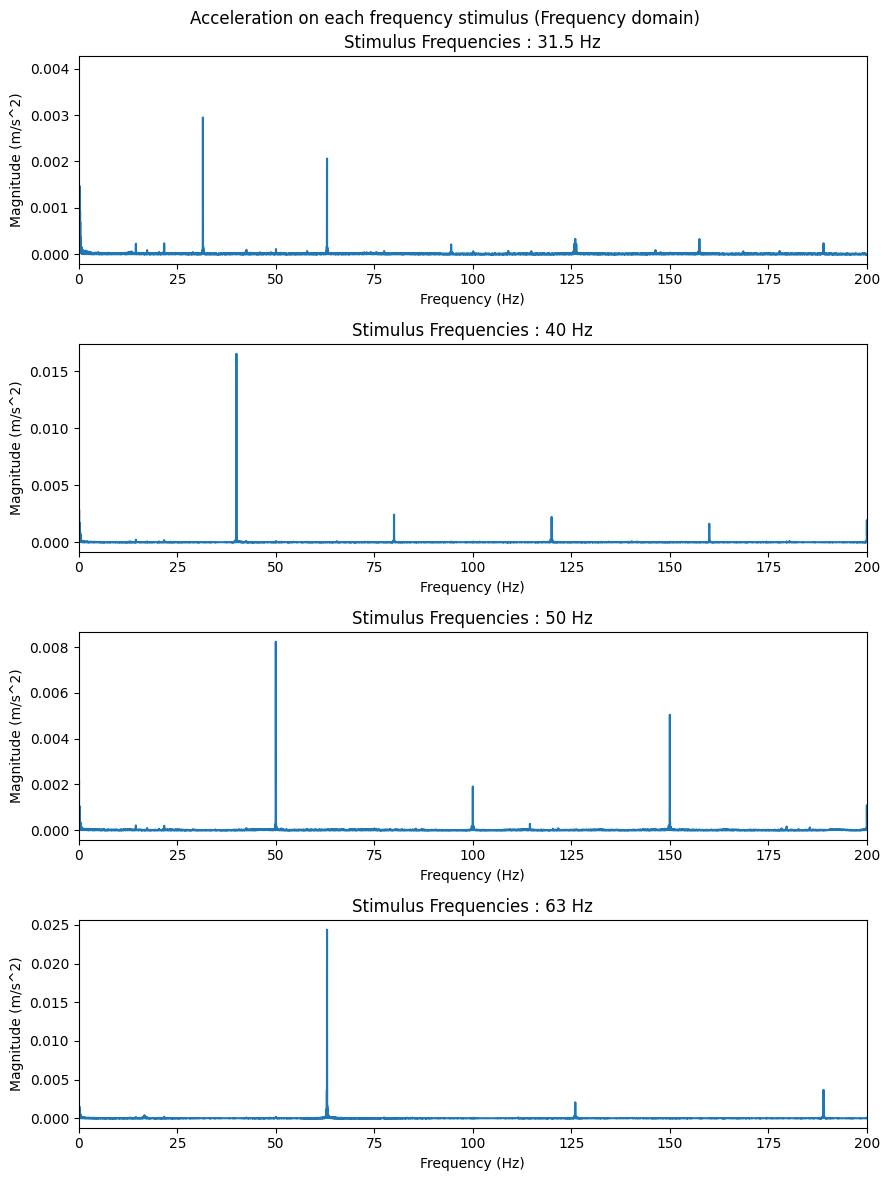

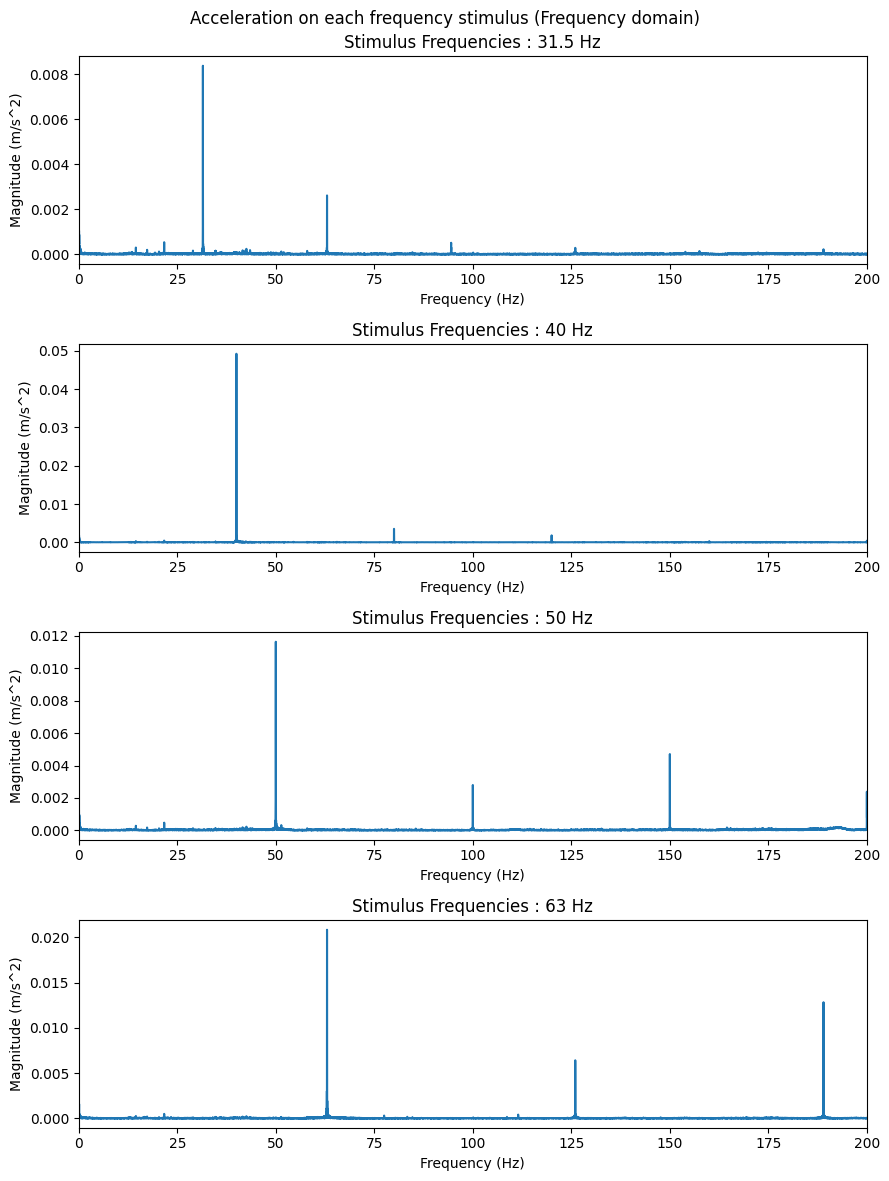

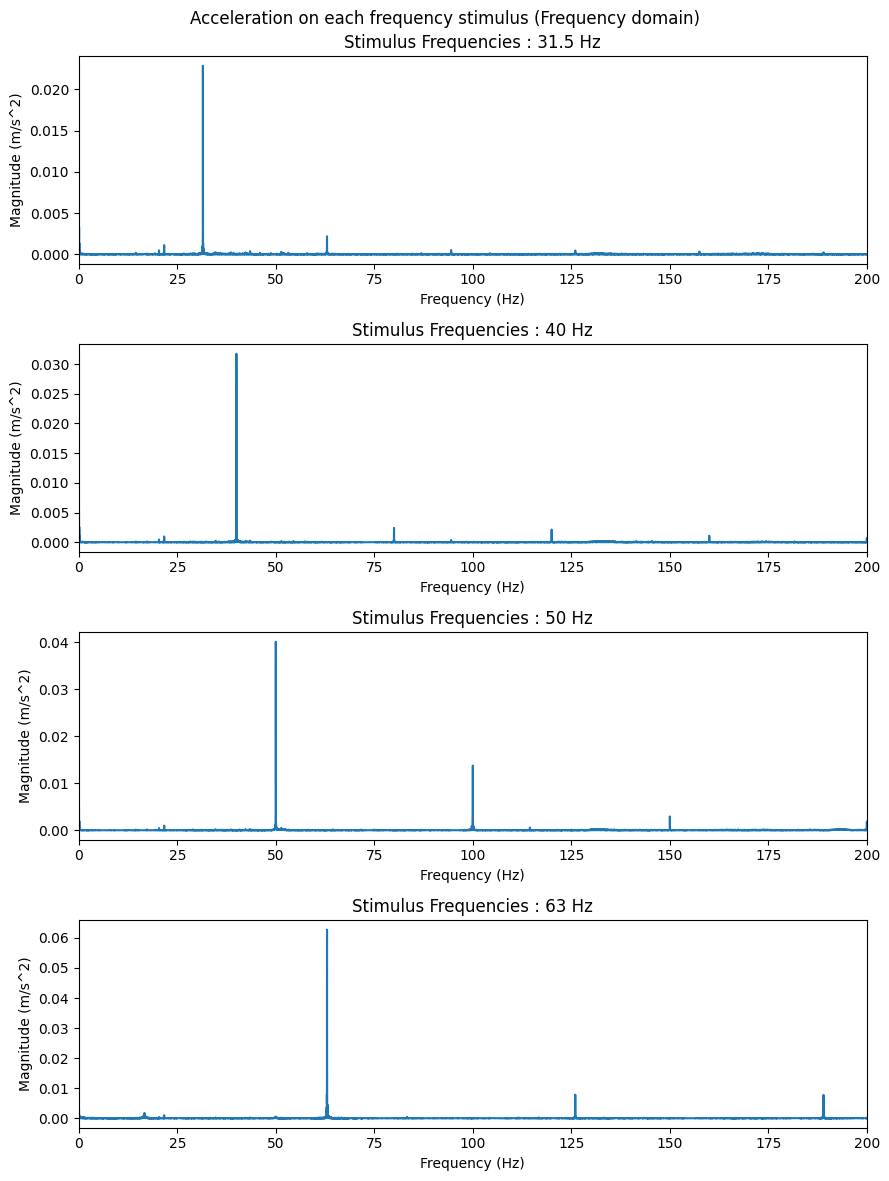

In [39]:
## Tranforming segmented data to frequency domain using Fast-Fourier Transform
for pivot in range(len(segmented_data)):
    plt.figure(figsize=(9,12), tight_layout=True)
    plt.suptitle("Acceleration on each frequency stimulus (Frequency domain)")
    for i in range(len(datapoints)):
        plt.subplot(len(datapoints),1,i+1)
        
        # applying FFT
        acc = segmented_data[pivot][i]
        nfft = int(pow(2, np.ceil(np.log2(len(acc)))))
        win = np.hamming(len(acc))
        freq = (ni_fs/2) * np.arange(0,1,1/(nfft/2+1))

        ACC = 2/len(acc) * np.fft.fft(win*acc, nfft)

        plt.plot(freq, abs(ACC)[0:int(nfft/2+1)])
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude (m/s^2)")
        plt.xlim([0, 200])
        plt.title("Stimulus Frequencies : " + freq_stimulus[i] + " Hz")

plt.show()


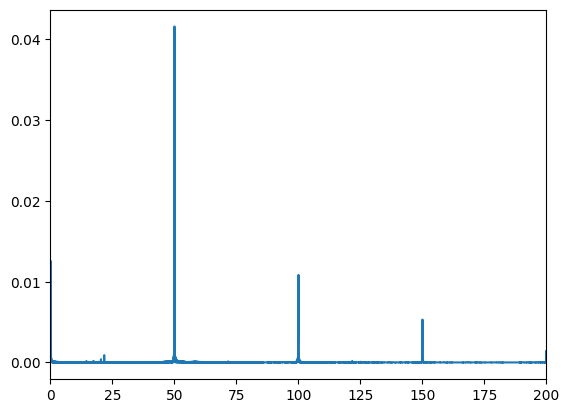

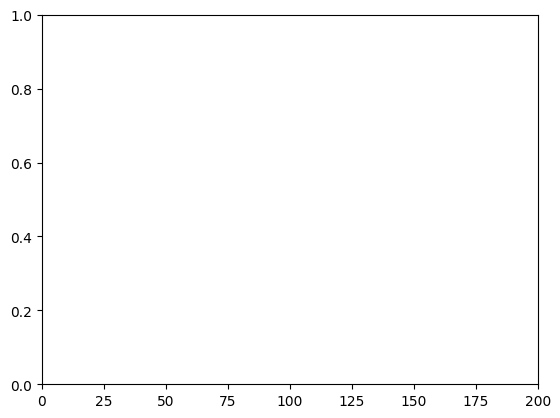

In [18]:
plt.xlim([0,200])
plt.show()